# Problem Set 1, due September 3rd at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       7.6.1 (need at least 1.0)
Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.3.2 (need at least 0.12.0)
Pandas version:       0.25.3 (need at least 0.11.0)
Maplotlib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.21.3 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
#print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
# enter your code here

#1.1.1 Checking number of variables and observations
print("Ques. 1.1.1")
print(boston.shape)
print(bdata.target.shape)
print()

#1.1.2 Neighborhoods where tract bounds Charles River: checking no of instances where variable CHAS == 1 
print("Ques. 1.1.2")
print(sum(boston.CHAS==1))
print()

#1.1.3 Showing there are no missing values, using isna() should return zero for all variables
print("Ques. 1.1.3")
print(boston.isna().sum())
print()

#1.1.4 Property tax rate in the 5 neighborhoods that have the highest median housing price
print("Ques. 1.1.4")
boston['MEDV']=bdata.target
print(boston.sort_values("MEDV",ascending=False)["TAX"].head(5))

Ques. 1.1.1
(506, 13)
(506,)

Ques. 1.1.2
35

Ques. 1.1.3
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Ques. 1.1.4
283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64


*Provide our answers below:*

 - 1.1.1: There are **14 variables** (13 features in boston frame and 1 target attribute- MEDV) and **506 observations**
 - 1.1.2: **35**
 - 1.1.3: Doing sum on the isna() on the boston frame gave zero for all variables, means there are no missing values
 - 1.1.4: Property tax rate in the 5 neighborhoods that have the highest median housing price: **198.0, 307.0, 666.0, 666.0, 666.0**

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [7]:
# enter your code here

#1.2.1 Median housing price in Boston's most expensive neighborhood
print("Ques. 1.2.1")
print(max(boston.MEDV))
print()

#1.2.2 neighborhoods with, on average, less than 5 rooms per dwelling
print("Ques. 1.2.2")
print(sum(boston.RM < 5))
print()

#1.2.3 property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
print("Ques. 1.2.3")
print(boston.TAX[(boston.MEDV==max(boston.MEDV)) & (boston.CHAS==1)])
print()

#1.2.4 crime rate in the neighborhood with the highest median housing price
print("Ques. 1.2.4")
print(boston.CRIM[boston.MEDV==max(boston.MEDV)])
print()

#1.2.5 crime rate in the neighborhood with the lowest median housing price
print("Ques. 1.2.5")
print(boston.CRIM[boston.MEDV==min(boston.MEDV)])
print()

Ques. 1.2.1
50.0

Ques. 1.2.2
15

Ques. 1.2.3
162    403.0
163    403.0
283    198.0
369    666.0
370    666.0
372    666.0
Name: TAX, dtype: float64

Ques. 1.2.4
161    1.46336
162    1.83377
163    1.51902
166    2.01019
186    0.05602
195    0.01381
204    0.02009
225    0.52693
257    0.61154
267    0.57834
283    0.01501
368    4.89822
369    5.66998
370    6.53876
371    9.23230
372    8.26725
Name: CRIM, dtype: float64

Ques. 1.2.5
398    38.3518
405    67.9208
Name: CRIM, dtype: float64



*Provide our answers below:*

 - 1.2.1: 50*1000 Dollars
 - 1.2.2: 15 neighborhoods
 - 1.2.3: There are six most expensive neighborhoods which are adjacent to the Charles River with the following property tax rate: 403.0, 403.0, 198.0, 666.0, 666.0, 666.0. Three unique TAX rate (per 10000 dollars) are: 403, 198 and 666.
 - 1.2.4: There are 16 neighborhoods with the highest median housing price as can be seen above. One of them has the crime rate: 1.46 per capita. 
 - 1.2.5: There are 2 neighborhoods with the lowest median housing price. Crime rate in those two neighborhood are: 38.35 and 67.92 per capita.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
# enter your code here

req= {'Count_Non-Missing': boston.notnull().sum(),
      'Mean': boston.mean(),
      'StandardDeviation': boston.std(),
      'Min': boston.min(),
      'Median': boston.median(),
      'Max': boston.max() 
     }
                               
data_summary=pd.DataFrame(data=req)
data_summary.index.name = 'Variable'
data_summary=data_summary.reset_index()
data_summary

,Variable,Count_Non-Missing,Mean,StandardDeviation,Min,Median,Max
0,CRIM,506,3.613524,8.601545,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [9]:
# enter your code here
from scipy import stats

#MEDV data where the neighborhood is adjacent to the River
data1= boston.MEDV[boston.CHAS==1]

#MEDV data where the neighborhood is not adjacent to the River
data2= boston.MEDV[boston.CHAS==0]

t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var = False)
print("t = " + str(t_statistic))
print("p = " + str(p_value))

t = 3.113291312794837
p = 0.003567170098137517


Null Hypothesis: **Mean** of median house value in locations adjacent to the Charles River and in locations that are not adjacent to the Charles River is **same**

Alternate Hypothesis: **Mean** of median house value in locations adjacent to the Charles River and in locations that are not adjacent to the Charles River is **not same**

Since the p-value of the test is very small, if we assume the thresold of 5% (p-value is less than 0.05), we reject the null hypothesis of equivalent house prices.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


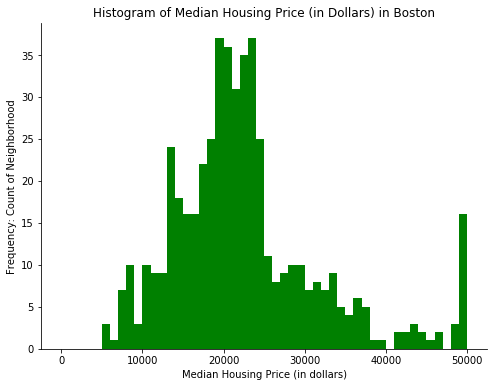

In [10]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.hist(bdata.target*1000,bins=50,range=[0,50000],color="green",edgecolor="none")
ax.set_xlabel("Median Housing Price (in dollars)")
ax.set_ylabel("Frequency: Count of Neighborhood")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Histogram of Median Housing Price (in Dollars) in Boston");

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


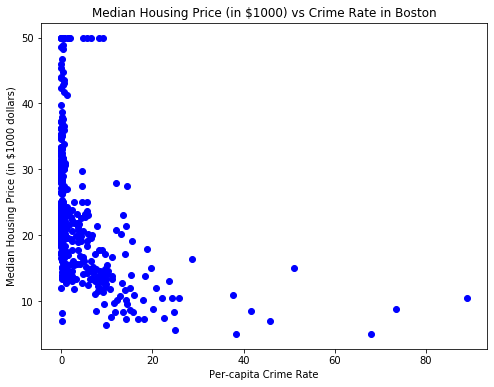

In [11]:
# enter your code here
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.scatter(boston.CRIM,boston.MEDV,color="blue")
ax.set_xlabel("Per-capita Crime Rate")
ax.set_ylabel("Median Housing Price (in $1000 dollars)")
ax.set_title("Median Housing Price (in $1000) vs Crime Rate in Boston");

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

The above scatter plot shows an overall negative relationship between crime rates and housing prices in Boston. As we can see from the graph, as the housing prices increases, crime rates decreases. 

Correlation between Crime Rates and Housing Prices: -0.388305

We know correlation scores varies from -1 to 1 where perfect positive correlation is 1 and perfect negative correlation is -1. A score of -0.39 between the two variables suggests that there is a negative relation between the two but as the magnitude is not very large, the relation is not that significant. In my opinion, this relationship is not causal as the score is low which represents a very weak relation.

In [12]:
#Calculating correlation between MEDV and CRIM
np.corrcoef(boston.MEDV,boston.CRIM)

array([[ 1.        , -0.38830461],
       [-0.38830461,  1.        ]])

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

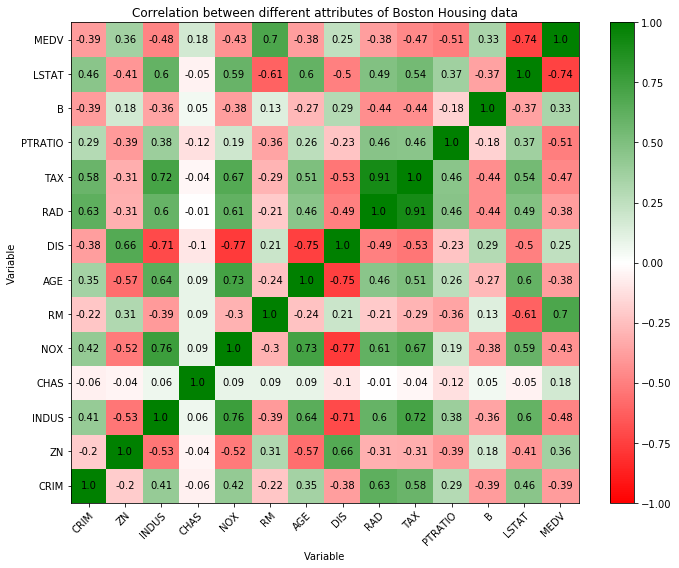

In [13]:
# enter your code here
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from  matplotlib.colors import LinearSegmentedColormap

cmapGR=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

#using corr function to calculate correlation between all pairs of variables
corr_matrix=boston.corr()

p=ax.pcolormesh(corr_matrix.values,cmap=cmapGR,vmin=-1,vmax=1)
fig.colorbar(p,ax=ax)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j+0.5,i+0.5, corr_matrix.values[i,j].round(2), ha="center", va="center")
        
ax.set_xticks(np.arange(len(corr_matrix.columns))+0.5)
ax.set_yticks(np.arange(len(corr_matrix.columns))+0.5)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

ax.set_xlabel("Variable")
ax.set_ylabel("Variable")
ax.set_title("Correlation between different attributes of Boston Housing data");

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig.tight_layout()
plt.show()

Seeing the graph:

**Most Positively correlated:** Most positive value is seen between the variable TAX (full-value property-tax rate per $10,000) and RAD (index of accessibility to radial highways). Other pairs having high positive correlation are: (NOX and INDUS) and (NOX and AGE)

**Most Negatively correlated:** Most negative value is seen between the variable DIS (weighted distances to five Boston employment centres) and NOX (nitric oxides concentration). Other pairs having high negative correlation are: (AGE and DIS) and (LSTAT and MEDV).

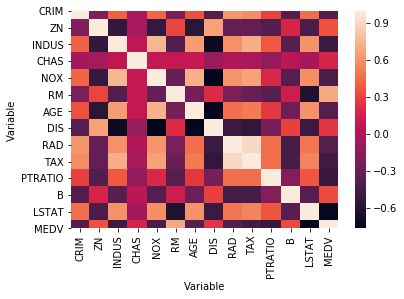

In [14]:
# Alterntively,we could also generate similar heat map direclty using seaborn library:
import seaborn as sns
sns.heatmap(corr_matrix);

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

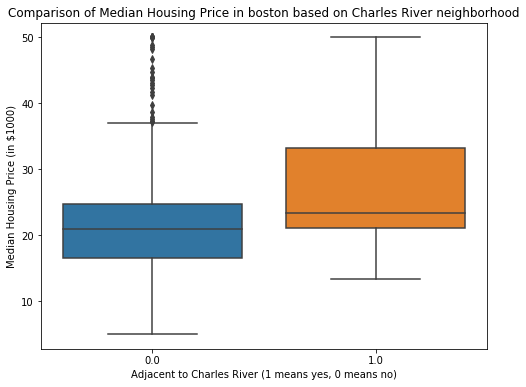

In [15]:
# enter your code here
plt.figure(figsize=(8, 6))
sns.boxplot(x="CHAS", y="MEDV", data=boston)
plt.title("Comparison of Median Housing Price in boston based on Charles River neighborhood")
plt.xlabel("Adjacent to Charles River (1 means yes, 0 means no)")
plt.ylabel("Median Housing Price (in $1000)");

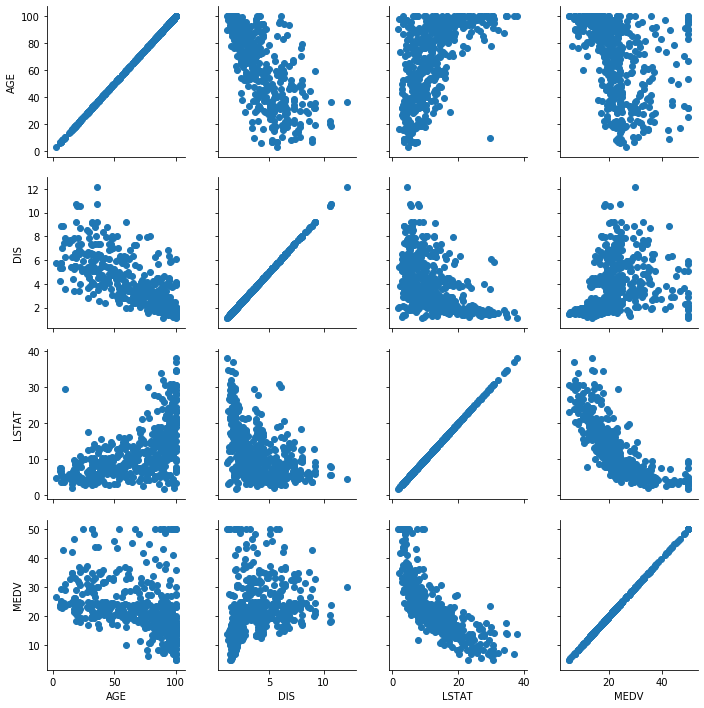

In [16]:
#Another Exploration graph we can make by using PairGrid from the seaborn library, that can help us to create the
#scatter plot for all possible pairs of seemingly important variables in the data

import seaborn as sns

boston_req=boston[["AGE","DIS","LSTAT","MEDV"]]
scatter_pair= sns.PairGrid(data=boston_req)  
scatter_pair.map(plt.scatter);